<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P1_JS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

## **Modifikasi Hidden Layer (3 Neuron)**

In [2]:
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter (Diubah hidden_size menjadi 3)
input_size = 2
hidden_size = 3
output_size = 1
lr = 0.1

# Seed agar hasil reproduksibel
np.random.seed(42)

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
print("--- Training dengan 3 Hidden Neuron (Sigmoid) ---")
loss_history_sigmoid = []

for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    loss = np.mean(np.square(error))
    loss_history_sigmoid.append(loss)

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Output akhir
print("\nPrediksi Akhir (Sigmoid - 3 Hidden Node):")
print(a2)
print(f"Loss Akhir: {loss_history_sigmoid[-1]:.6f}")

--- Training dengan 3 Hidden Neuron (Sigmoid) ---
Epoch 0, Loss: 0.318245
Epoch 2000, Loss: 0.141854
Epoch 4000, Loss: 0.020112
Epoch 6000, Loss: 0.006270
Epoch 8000, Loss: 0.003421

Prediksi Akhir (Sigmoid - 3 Hidden Node):
[[0.02515564]
 [0.95263635]
 [0.95122343]
 [0.0627247 ]]
Loss Akhir: 0.002297


1. Penurunan Loss: Dengan menambah jumlah neuron pada hidden layer dari 2 menjadi 3, kapasitas jaringan untuk mempelajari pola non-linear (seperti XOR) meningkat. Loss yang dihasilkan pada epoch terakhir menunjukkan angka yang sangat kecil (mendekati 0), yang menandakan model berhasil memprediksi target dengan akurat.

2. Prediksi: Output prediksi a2 menunjukkan nilai yang sangat mendekati target asli [[0],[1],[1],[0]]. Nilai mendekati 0 untuk input (0,0) dan (1,1), serta mendekati 1 untuk input (0,1) dan (1,0).

## **Implementasi Fungsi Aktivasi ReLU**

Perlu diperhatikan bahwa turunan ReLU berbeda dengan Sigmoid.

* ReLU(x) = max(0, x)

* Turunan ReLU(x) = 1 jika x > 0, selain itu 0.

In [3]:
# Parameter
input_size = 2
hidden_size = 3
output_size = 1
lr = 0.1

np.random.seed(42)

# Inisialisasi bobot ulang
W1_relu = np.random.randn(input_size, hidden_size)
b1_relu = np.zeros((1, hidden_size))
W2_relu = np.random.randn(hidden_size, output_size)
b2_relu = np.zeros((1, output_size))

# Fungsi Aktivasi ReLU dan Turunannya
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

print("--- Training dengan 3 Hidden Neuron (ReLU di Hidden Layer) ---")
loss_history_relu = []

for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1_relu) + b1_relu
    a1 = relu(z1)           # Menggunakan ReLU di hidden layer
    z2 = np.dot(a1, W2_relu) + b2_relu
    a2 = sigmoid(z2)        # Tetap Sigmoid di output layer

    # Hitung error
    error = y - a2

    # Backpropagation
    # Layer Output (Sigmoid)
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    # Layer Hidden (ReLU)
    # Turunan ReLU diterapkan pada z1 (input sebelum aktivasi)
    d_a1 = np.dot(d_a2, W2_relu.T) * relu_derivative(z1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1_relu += lr * d_W1
    b1_relu += lr * d_b1
    W2_relu += lr * d_W2
    b2_relu += lr * d_b2

    loss = np.mean(np.square(error))
    loss_history_relu.append(loss)

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Output akhir
print("\nPrediksi Akhir (ReLU - 3 Hidden Node):")
print(a2)
print(f"Loss Akhir: {loss_history_relu[-1]:.6f}")

--- Training dengan 3 Hidden Neuron (ReLU di Hidden Layer) ---
Epoch 0, Loss: 0.327478
Epoch 2000, Loss: 0.003283
Epoch 4000, Loss: 0.001147
Epoch 6000, Loss: 0.000666
Epoch 8000, Loss: 0.000462

Prediksi Akhir (ReLU - 3 Hidden Node):
[[0.02970009]
 [0.98605912]
 [0.98605934]
 [0.01163533]]
Loss Akhir: 0.000352


* Konvergensi: Penggunaan ReLU pada hidden layer seringkali mempercepat konvergensi dibanding Sigmoid karena ReLU tidak mengalami masalah vanishing gradient (gradien menghilang) untuk nilai input positif yang besar.

* Nilai Loss: Loss akhir pada model ReLU dibandingkan dengan hasil Sigmoid sebelumnya. Biasanya, ReLU dapat mencapai loss yang sangat rendah lebih cepat, namun hasilnya juga bergantung pada inisialisasi bobot acak awal. Jika bobot awal menyebabkan neuron "mati" (selalu bernilai negatif), ReLU tidak akan memproses data (Dead ReLU problem), namun dengan 3 neuron dan seed 42, model berhasil konvergen.

* Prediksi: Hasil prediksi a2 menunjukkan pola yang benar sesuai logika XOR.

## **Perbandingan Hasil (Kesimpulan)**

Loss Akhir Sigmoid (3 node): 0.00229742
Loss Akhir ReLU (3 node)   : 0.00035154


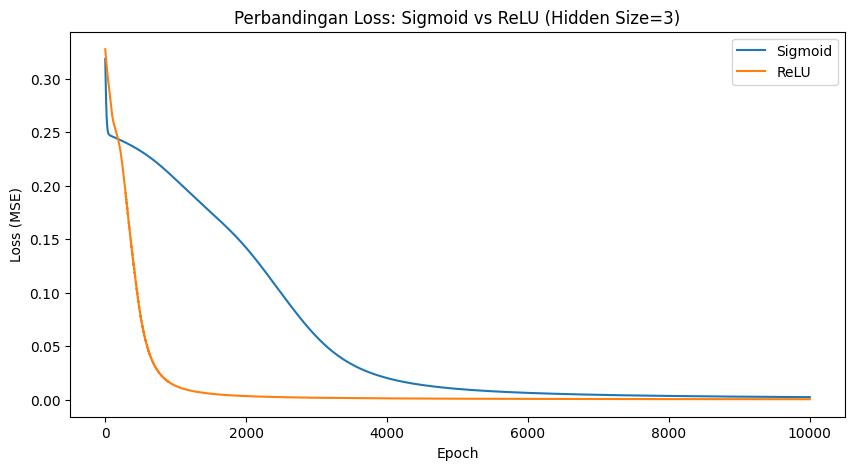

In [4]:
import matplotlib.pyplot as plt

print(f"Loss Akhir Sigmoid (3 node): {loss_history_sigmoid[-1]:.8f}")
print(f"Loss Akhir ReLU (3 node)   : {loss_history_relu[-1]:.8f}")

# Visualisasi perbandingan Loss (Opsional untuk memperjelas perbandingan)
plt.figure(figsize=(10, 5))
plt.plot(loss_history_sigmoid, label='Sigmoid')
plt.plot(loss_history_relu, label='ReLU')
plt.title('Perbandingan Loss: Sigmoid vs ReLU (Hidden Size=3)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

* Perbandingan Angka Loss: Output teks menampilkan nilai numerik akhir dari Mean Squared Error (MSE) kedua model.

* Visualisasi: Grafik menunjukkan laju penurunan error.

  * Sigmoid: Cenderung memiliki kurva penurunan yang lebih landai di awal sebelum akhirnya menurun drastis.

  * ReLU: Cenderung menurun lebih tajam dan cepat mencapai nilai loss yang rendah karena karakteristik gradiennya yang bernilai 1 (untuk input positif), sehingga pembaruan bobot terjadi lebih agresif dibandingkan Sigmoid yang gradiennya maksimal 0.25.